In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing basic modules
import math
import os
import gc
import random
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warning Libraries
import warnings
warnings.filterwarnings("ignore")


from collections import Counter
from scipy import stats
from scipy.stats.contingency import association

#Plotly visualization
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot



from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif, chi2

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Algorithms
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Boosting Algorithms
!pip install catboost
!pip install lightgbm==2.2.3
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier, Pool
from lightgbm                         import LGBMClassifier

!pip install optuna
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

import multiprocessing
import pickle, joblib
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc

from sklearn.utils import resample
from IPython.display import Markdown, display

#utility function to print markdown string
def printmd(string):
    display(Markdown(string))

plt_params = {
    'axes.facecolor' : 'white',

}

plt.rcParams.update(plt_params)

sns.set_style('whitegrid')

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.7 MB/s eta 0:00:00


In [ ]:
!pip freeze | grep optuna
!pip freeze | grep xgboost
!pip freeze | grep catboost
!pip freeze | grep lightgbm
!pip freeze | grep plotly
!pip freeze | grep scipy
!pip freeze | grep scikit-learn

optuna==3.4.0
xgboost==2.0.2
catboost==1.2.2
lightgbm==2.2.3
plotly==5.15.0
scipy==1.11.4
scikit-learn==1.2.2


In [ ]:
left_padding = 21

SEED = 42

#set optuna verbosity level
optuna_verbosity = optuna.logging.WARNING

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

In [ ]:
df_churn = pd.read_csv("/content/drive/MyDrive/Project/WA_Fn-UseC_-Telco-Customer-Churn.csv") #CHANGE THE PATH ACCORDING TO YOUR SYSTEM!!!!!
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(f"Dataset Dimensions: {df_churn.shape[0]} rows,  {df_churn.shape[1]} columns")

Dataset Dimensions: 7043 rows,  21 columns


In [ ]:
df_churn.info()

printmd("**SeniorCitizen** is already converted to integer but **TotalCharges** should be converted to float")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**SeniorCitizen** is already converted to integer but **TotalCharges** should be converted to float

In [ ]:
del df_churn["customerID"]

In [ ]:
df_churn.describe(include=['object']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [ ]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_churn.index),len(df_churn.drop_duplicates().index)))

Known observations: 7043
Unique observations: 7021


In [ ]:
printmd("**Unique Values By Features**")
for feature in df_churn.columns:
    uniq = np.unique(df_churn[feature])
    print(feature.ljust(left_padding),len(uniq))

**Unique Values By Features**

gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure                73
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges        1585
TotalCharges          6531
Churn                 2


In [ ]:
df_churn.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
cat_cols = set(df_churn.columns) - set(df_churn._get_numeric_data().columns)

printmd("'**isna**' is only applicable for numerical data type")
printmd("Checking missing values for object data type")

for cat in cat_cols:
  print(cat.ljust(left_padding), df_churn[cat].apply(lambda x:len(x.strip()) == 0 or x.strip().lower() == 'nan').sum())

printmd("TotalCharges is an object datatype, it has **11** 'NaN' value")

'**isna**' is only applicable for numerical data type

Checking missing values for object data type

Churn                 0
InternetService       0
DeviceProtection      0
TechSupport           0
OnlineBackup          0
gender                0
Partner               0
TotalCharges          11
MultipleLines         0
PhoneService          0
PaperlessBilling      0
StreamingMovies       0
Dependents            0
Contract              0
OnlineSecurity        0
StreamingTV           0
PaymentMethod         0


TotalCharges is an object datatype, it has **11** 'NaN' value

In [ ]:
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors = 'coerce')

In [ ]:
indices_null_tc = df_churn[df_churn["TotalCharges"].isna()].index

In [ ]:
display(df_churn.iloc[indices_null_tc])

printmd("**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**")
printmd("**when 'Tenure' is 0 , 'TotalCharges' is 0 too**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**

**when 'Tenure' is 0 , 'TotalCharges' is 0 too**

In [ ]:
display(df_churn[df_churn.tenure == 1].head(2))

printmd("**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**

In [ ]:
display(df_churn[df_churn.tenure == 3].head(2))

printmd("**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**")
printmd("From the above observation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**")
printmd("**Therefore, imputing missing values on 'TotalCharges' column with 0**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
65,Female,0,No,No,3,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.3,244.1,No
74,Female,0,No,Yes,3,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.5,177.4,No


**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**

From the above observation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**

**Therefore, imputing missing values on 'TotalCharges' column with 0**

In [ ]:
df_churn['TotalCharges'].fillna(0, inplace=True)

In [ ]:
df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [ ]:
def binning_feature(feature):
  plt.hist(df_churn[feature])

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

  bins = np.linspace(min(df_churn[feature]), max(df_churn[feature]), 4)
  printmd("**Value Range**")

  printmd(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
  printmd(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
  printmd(f"High ({bins[2]: .2f} - {bins[3]: .2f})")
  group_names = ['Low', 'Medium', 'High']

  df_churn.insert(df_churn.shape[1]-1,f'{feature}-binned', pd.cut(df_churn[feature], bins, labels=group_names, include_lowest=True))
  display(df_churn[[feature, f'{feature}-binned']].head(10))


  # count values
  printmd("<br>**Binning Distribution**<br>")
  display(df_churn[f'{feature}-binned'].value_counts())


  # plot the distribution of each bin
  plt.bar(group_names, df_churn[f'{feature}-binned'].value_counts())


  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

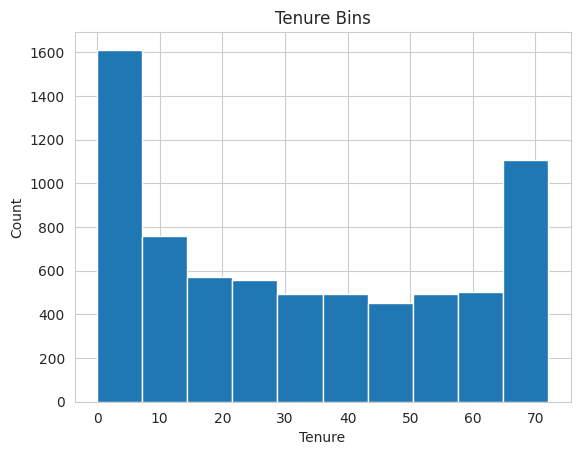

**Value Range**

Low ( 0.00 -  24.00)

Medium ( 24.00 -  48.00)

High ( 48.00 -  72.00)

,tenure,tenure-binned
0,1,Low
1,34,Medium
2,2,Low
3,45,Medium
4,2,Low
5,8,Low
6,22,Low
7,10,Low
8,28,Medium
9,62,High


<br>**Binning Distribution**<br>

Low       3210
High      2239
Medium    1594
Name: tenure-binned, dtype: int64

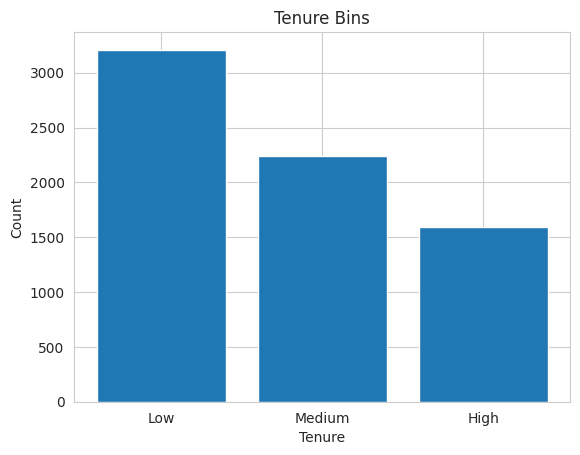

In [ ]:
binning_feature('tenure')

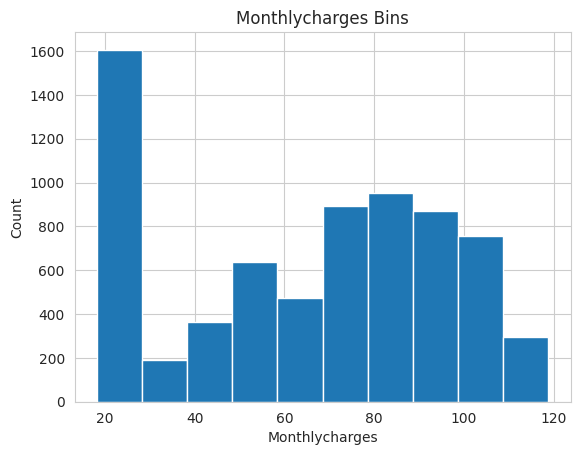

**Value Range**

Low ( 18.25 -  51.75)

Medium ( 51.75 -  85.25)

High ( 85.25 -  118.75)

,MonthlyCharges,MonthlyCharges-binned
0,29.85,Low
1,56.95,Medium
2,53.85,Medium
3,42.30,Low
4,70.70,Medium
5,99.65,High
6,89.10,High
7,29.75,Low
8,104.80,High
9,56.15,Medium


<br>**Binning Distribution**<br>

Low       2451
Medium    2439
High      2153
Name: MonthlyCharges-binned, dtype: int64

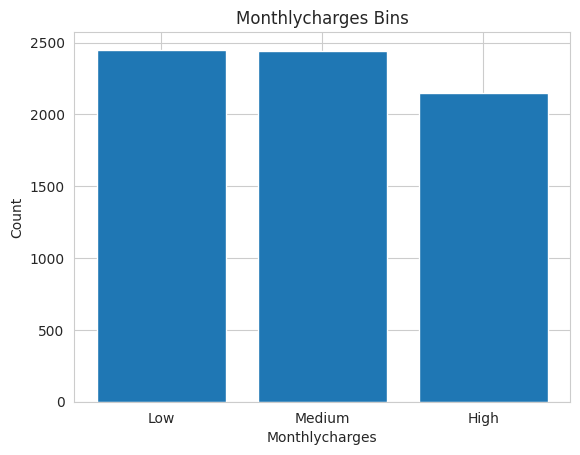

In [ ]:
binning_feature('MonthlyCharges')

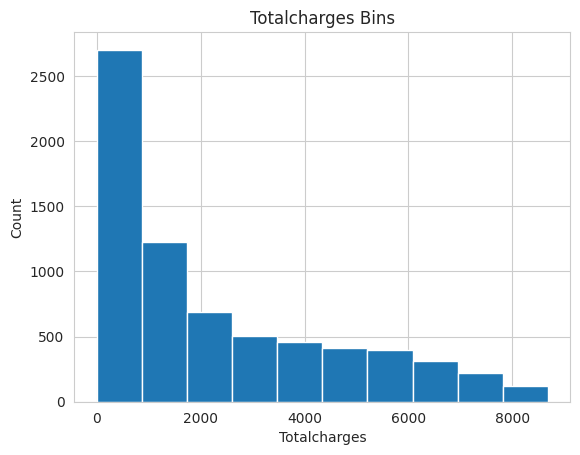

**Value Range**

Low ( 0.00 -  2894.93)

Medium ( 2894.93 -  5789.87)

High ( 5789.87 -  8684.80)

,TotalCharges,TotalCharges-binned
0,29.85,Low
1,1889.50,Low
2,108.15,Low
3,1840.75,Low
4,151.65,Low
5,820.50,Low
6,1949.40,Low
7,301.90,Low
8,3046.05,Medium
9,3487.95,Medium


<br>**Binning Distribution**<br>

Low       4782
Medium    1474
High       787
Name: TotalCharges-binned, dtype: int64

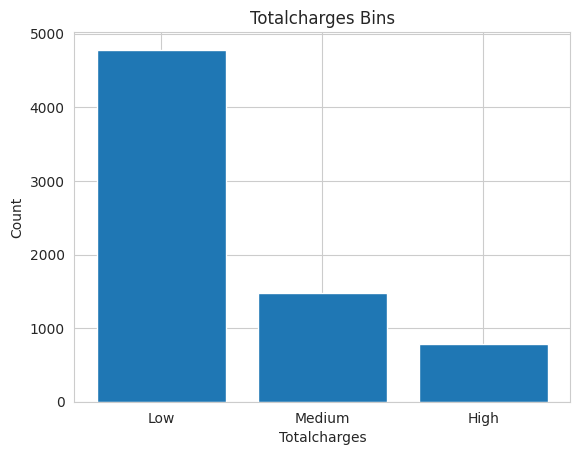

In [ ]:
binning_feature('TotalCharges')

In [ ]:
printmd("**Data Types**<br>")
df_churn.dtypes.value_counts()

**Data Types**<br>

object      16
category     3
int64        2
float64      2
dtype: int64

In [ ]:
fig = px.pie(df_churn['Churn'].value_counts().reset_index().rename(columns={'index':'Type'}), values='Churn', names='Type', title='Churn (Target) Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
printmd("### Target distribution is Imbalanced")

### Target distribution is Imbalanced

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_churn['OnlineSecurity'].value_counts().index, values=df_churn['OnlineSecurity'].value_counts().values, name="Online Security"),
              1, 1)
fig.add_trace(go.Pie(labels=df_churn['OnlineBackup'].value_counts().index, values=df_churn['OnlineBackup'].value_counts().values, name="Online Backup"),
              1, 2)
fig.add_trace(go.Pie(labels=df_churn['DeviceProtection'].value_counts().index, values=df_churn['DeviceProtection'].value_counts().values, name="Device Protection"),
              2, 1)
fig.add_trace(go.Pie(labels=df_churn['TechSupport'].value_counts().index, values=df_churn['TechSupport'].value_counts().values, name="Tech Support"),
              2, 2)

# donut-like pie chart
fig.update_traces(hole=0, hoverinfo="label+percent")

fig.update_layout(

    # Add annotations in the center of the donut pies.
    annotations=[dict(text='OnlineSecurity', x=0.195, y=0.85, font_size=20, showarrow=False),
                 dict(text='OnlineBackup', x=0.805, y=0.84, font_size=20, showarrow=False),
                 dict(text='DeviceProtection', x=0.185, y=0.18, font_size=20, showarrow=False),
                 dict(text='TechSupport', x=0.805, y=0.18, font_size=20, showarrow=False)])
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()



printmd("### 'Online Backup', 'Device Protection' and 'Online Security', 'Tech Support' has similar distribution")


### 'Online Backup', 'Device Protection' and 'Online Security', 'Tech Support' has similar distribution

In [ ]:
display(px.pie(df_churn['PaymentMethod'].value_counts().reset_index().rename(columns={'index':'Type'}), values='PaymentMethod', names='Type', title='Payment Method Distribution'))

printmd("#### Most of the customers use E-check")

#### Most of the customers use E-check

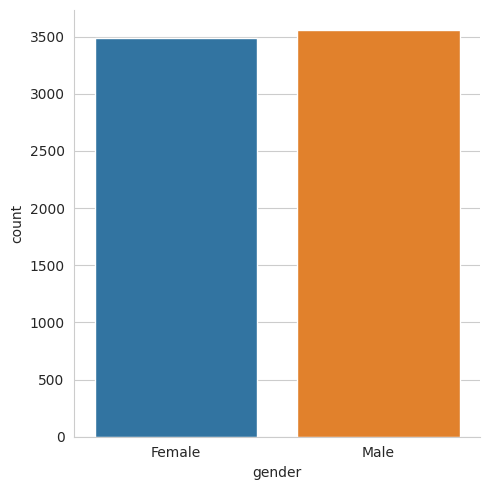

#### Approximately 50/50 gender ratio

In [ ]:
sns.catplot(x="gender", kind="count", data=df_churn)
plt.show()

printmd("#### Approximately 50/50 gender ratio")

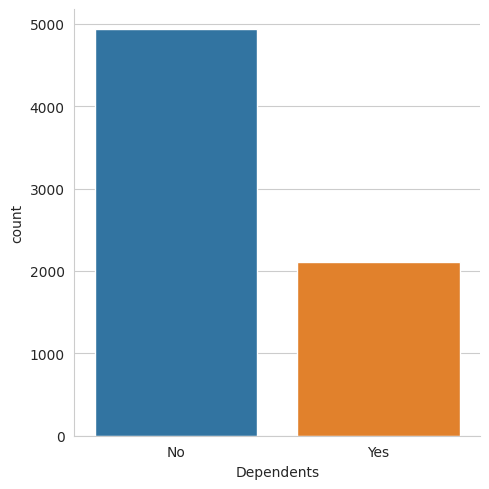

#### Users who have non-dependents are approximately two times more than users having dependents

In [ ]:
sns.catplot(x="Dependents", kind="count", data=df_churn)
plt.show()

printmd("#### Users who have non-dependents are approximately two times more than users having dependents")


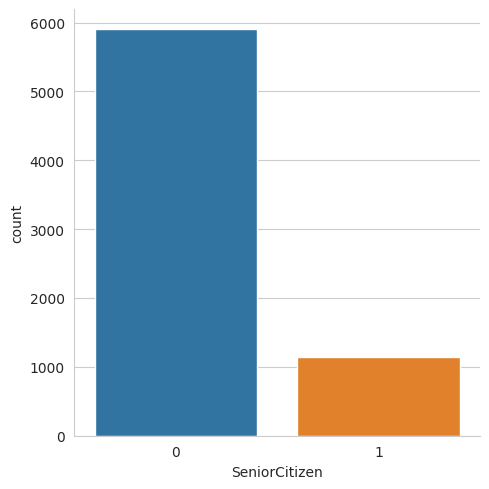

#### The majority of the users are not Senior Citizen

In [ ]:
sns.catplot(x="SeniorCitizen", kind="count", data=df_churn)
plt.show()

printmd("#### The majority of the users are not Senior Citizen")


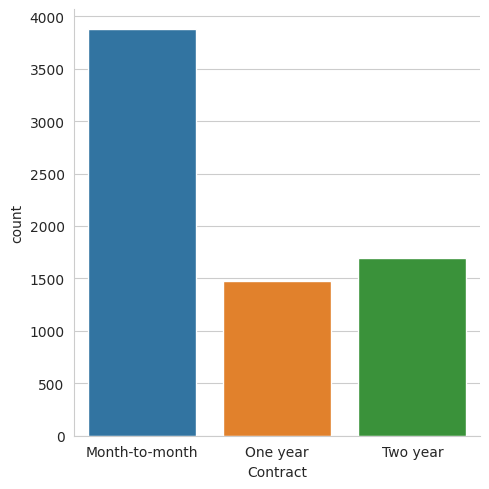

#### Most of the users prefer Month-to-month contract

In [ ]:
sns.catplot(x="Contract", kind="count", data=df_churn)
plt.show()

printmd("#### Most of the users prefer Month-to-month contract")

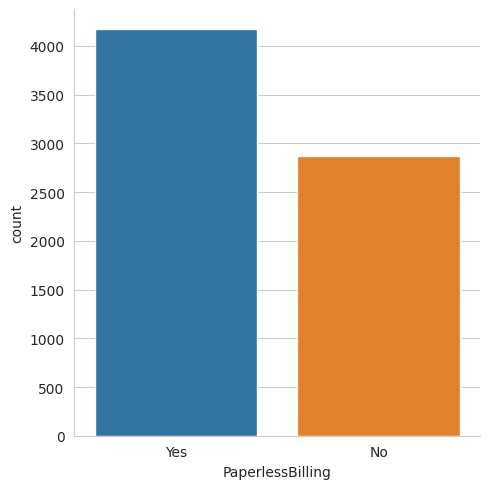

#### Most of the users prefer paperless billing

In [ ]:
sns.catplot(x="PaperlessBilling", kind="count", data=df_churn)
plt.show()

printmd("#### Most of the users prefer paperless billing")

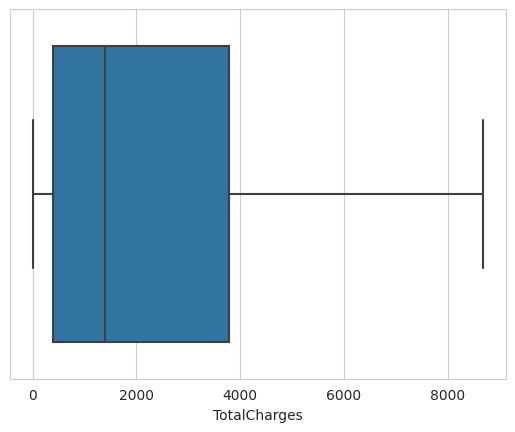

#### The total charges fall under 4000 for majority of the users

In [ ]:
sns.boxplot(x=df_churn["TotalCharges"])
plt.show()

printmd("#### The total charges fall under 4000 for majority of the users")

In [ ]:
def plot_histogram(feature):


    # Create subplot object
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"Distribution of {feature.name} with Histogram", f"Distribution of {feature.name} with Density Plot"))

    # This is a count histogram
    fig.add_trace(
        go.Histogram(
            x = feature,
            hoverinfo="x+y"
        ),
    row=1,col=1)

    # This is a density histogram
    fig.add_trace(
        go.Histogram(
            x = feature,
            hoverinfo="x+y",
            histnorm = "density"
        ),
    row=2,col=1)

    # Update layout
    fig.layout.update(
        height=800,
        width=870,
        hovermode="closest"
        )

    # Update axes
    fig.layout.yaxis1.update(title="Abs Frequency")
    fig.layout.yaxis2.update(title="Density(%)")
    fig.layout.xaxis2.update(title=f"{feature.name}")
    return fig.show()

In [ ]:
plot_histogram(df_churn['tenure'])

printmd("**Tenure is U-shaped distributed**")

**Tenure is U-shaped distributed**

In [ ]:
plot_histogram(df_churn['MonthlyCharges'])

printmd("**MonthlyCharges is heavily skewed**")

**MonthlyCharges is heavily skewed**

In [ ]:
plot_histogram(df_churn['TotalCharges'])

printmd("**TotalCharges is reversed J-shaped distributed**")

**TotalCharges is reversed J-shaped distributed**

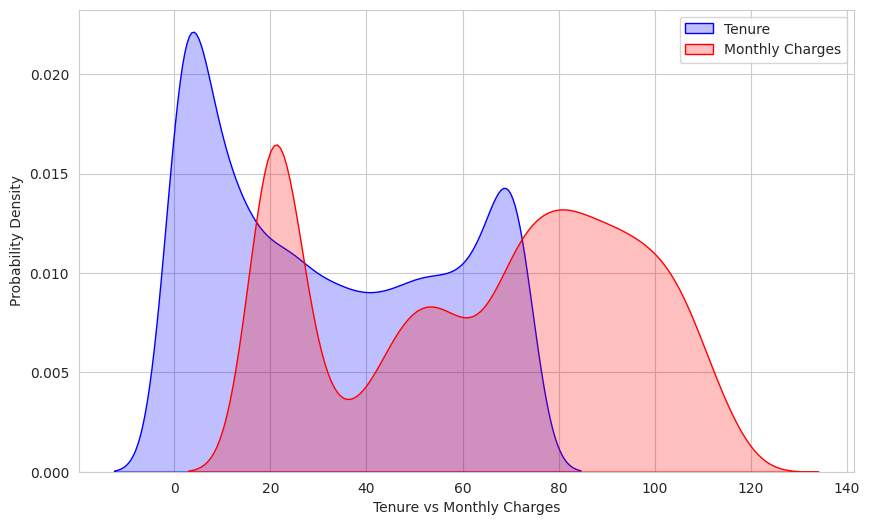

**Both are are not normally distributed, skewed,Tenure has a
Bi-modal distribution Most users stayed for less than 20 months,
Monthly Charges for most people is nearly 20 unit**

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.kdeplot(df_churn.tenure, color='b', shade=True, label='Tenure')
sns.kdeplot(df_churn.MonthlyCharges, color='r', shade=True, label='Monthly Charges')

plt.xlabel('Tenure vs Monthly Charges')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

printmd("""**Both are are not normally distributed, skewed,Tenure has a
Bi-modal distribution Most users stayed for less than 20 months,
Monthly Charges for most people is nearly 20 unit**""")

In [ ]:
df_g = df_churn.groupby(['StreamingTV', 'Churn']).size().reset_index()
df_g['percentage'] = df_churn.groupby(['StreamingTV', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['StreamingTV', 'Churn', 'Counts', 'Percentage']

fig = px.bar(df_g, x='StreamingTV', y='Counts',
       color='Churn',
       color_discrete_map={
        'Yes': '#99D594',
        'No': '#FC8D59',
    },
    text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

display(fig)
printmd("**Similar ratio between streamer vs non-streamer in churned users**")


**Similar ratio between streamer vs non-streamer in churned users**

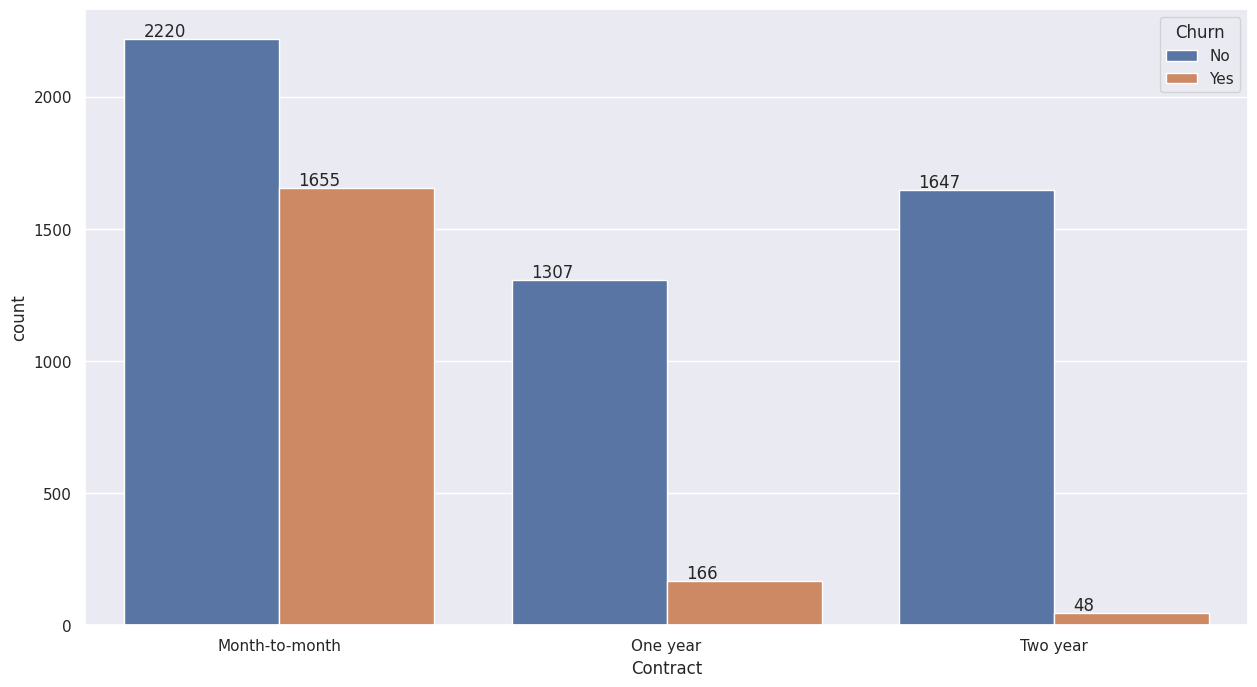

**Most churned users has Month-to-month contract**

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Contract',hue='Churn',data=df_churn)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users has Month-to-month contract**")

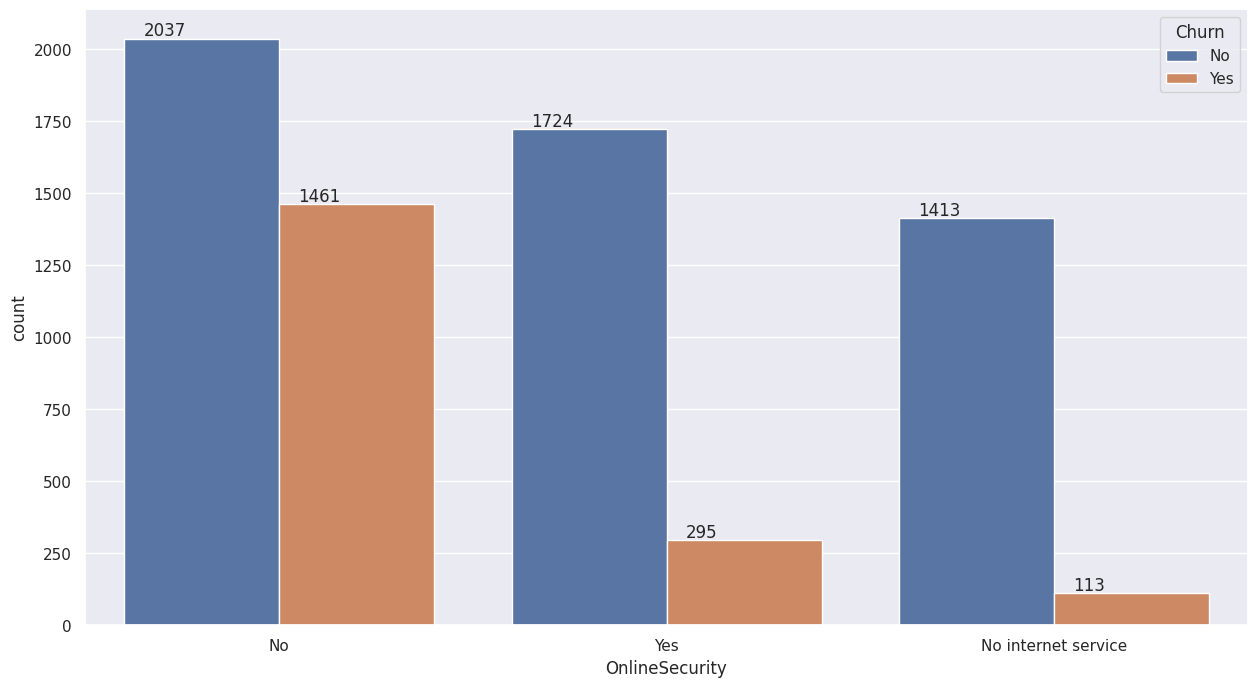

**Most churned users didn't have online security**

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='OnlineSecurity',hue='Churn',data=df_churn)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users didn't have online security**")

**Most users who churned do not have a partner in contrast to the users who does**

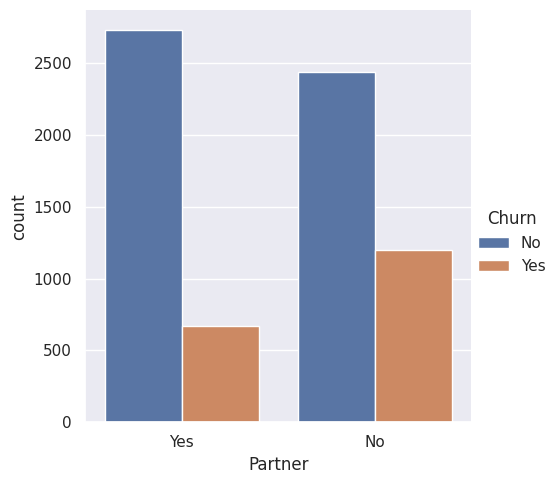

In [ ]:
sns.catplot(x='Partner',hue='Churn',data=df_churn, kind="count");

printmd("**Most users who churned do not have a partner in contrast to the users who does**")

**Gender is uncorrelated with churn rate**

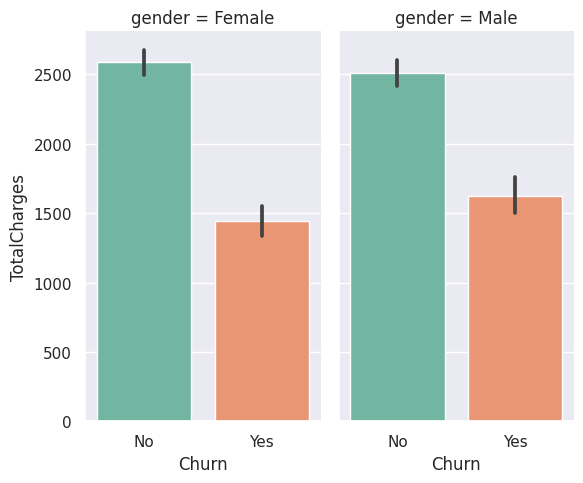

In [ ]:
sns.catplot(x='Churn',y='TotalCharges', col = 'gender', data=df_churn,
                kind='bar', aspect=.6, palette='Set2')

printmd("**Gender is uncorrelated with churn rate**")


In [ ]:
px.box(df_churn, x="Churn", y="MonthlyCharges")

In [ ]:
px.box(df_churn, x="Churn", y="TotalCharges")

In [ ]:
px.box(df_churn, x="Churn", y="tenure")

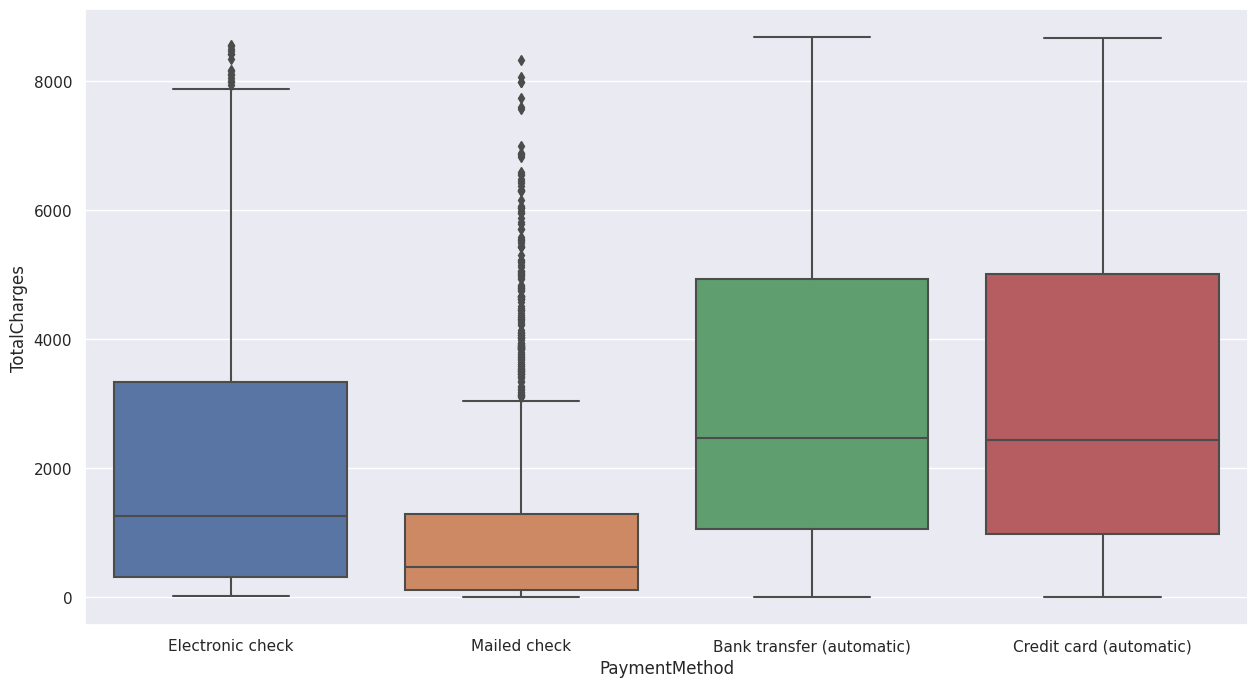

**Total Charges for many users are in extreme level in Mailed Check payment method**

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="TotalCharges", data=df_churn)
plt.show()

printmd("**Total Charges for many users are in extreme level in Mailed Check payment method**")

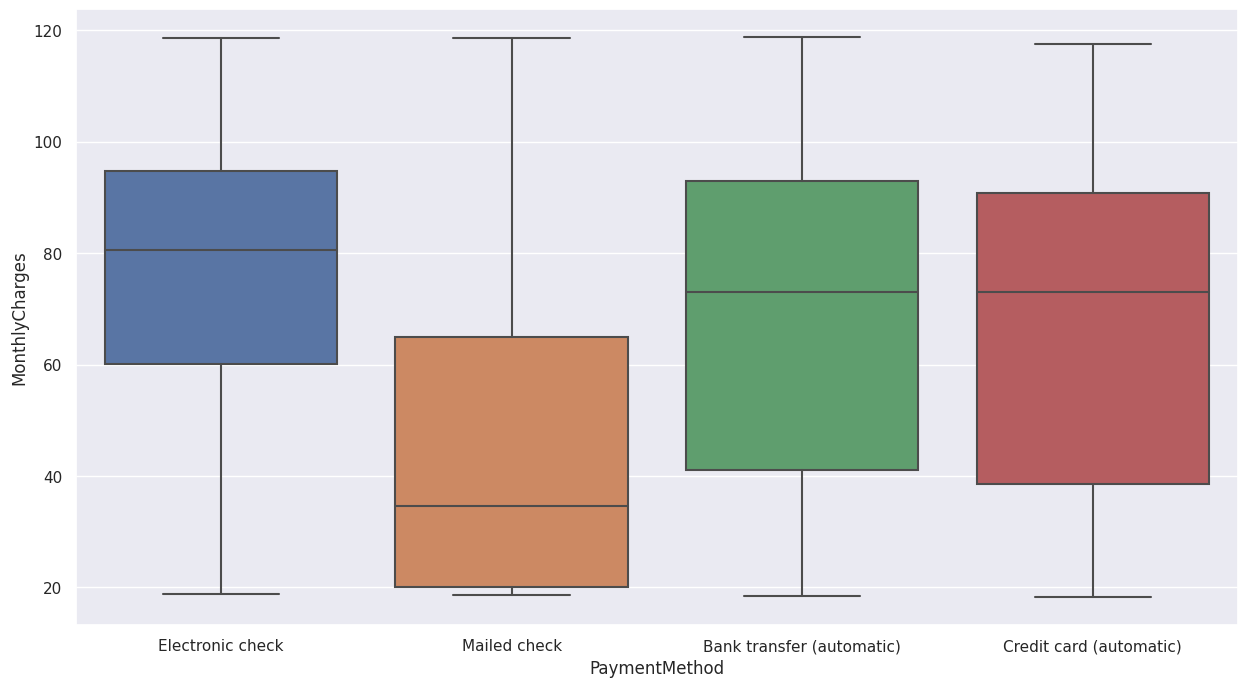

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="MonthlyCharges", data=df_churn)
plt.show()


In [ ]:
df_churn_cleaned = df_churn.copy()
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'yes'] = 1
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'no'] = 0

df_churn_cleaned['Churn'] = df_churn_cleaned['Churn'].astype('float')


In [ ]:
df_churn_ohe = pd.get_dummies(df_churn_cleaned)

# remove duplicated columns after on hot encoding
df_churn_ohe.drop(['MultipleLines_No phone service',
               'OnlineSecurity_No internet service',
               'OnlineBackup_No internet service',
               'DeviceProtection_No internet service',
               'TechSupport_No internet service',
               'StreamingTV_No internet service',
               'StreamingMovies_No internet service'],axis=1, inplace=True)

In [ ]:
df_churn_cleaned.to_csv("Telco-Customer-Churn-dataset-cleaned.csv", index=False)

In [ ]:
printmd("**Column Info**")
display(df_churn_cleaned.info())
printmd("**Datatypes Count**")
display(df_churn.dtypes.value_counts())
printmd("**Categorical Features**")
display(df_churn.describe(include=['object']).T)

**Column Info**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 7043 non-null   object  
 1   SeniorCitizen          7043 non-null   int64   
 2   Partner                7043 non-null   object  
 3   Dependents             7043 non-null   object  
 4   tenure                 7043 non-null   int64   
 5   PhoneService           7043 non-null   object  
 6   MultipleLines          7043 non-null   object  
 7   InternetService        7043 non-null   object  
 8   OnlineSecurity         7043 non-null   object  
 9   OnlineBackup           7043 non-null   object  
 10  DeviceProtection       7043 non-null   object  
 11  TechSupport            7043 non-null   object  
 12  StreamingTV            7043 non-null   object  
 13  StreamingMovies        7043 non-null   object  
 14  Contract               7043 non-null   o

None

**Datatypes Count**

object      16
category     3
int64        2
float64      2
dtype: int64

**Categorical Features**

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [ ]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
for train_index, test_index in strat_split.split(df_churn_cleaned, df_churn_cleaned["Churn"]):
    strat_train_set = df_churn_cleaned.loc[train_index]
    strat_test_set = df_churn_cleaned.loc[test_index]

print('Target Labels Ratio in Original Dataset\n')
print(df_churn_cleaned["Churn"].value_counts(normalize=True).sort_index())


print('\nTarget Labels Ratio in Test Dataset\n')
print(strat_test_set["Churn"].value_counts(normalize=True).sort_index())


Target Labels Ratio in Original Dataset

0.0    0.73463
1.0    0.26537
Name: Churn, dtype: float64

Target Labels Ratio in Test Dataset

0.0    0.734564
1.0    0.265436
Name: Churn, dtype: float64


In [ ]:
# train Dataset
X = strat_train_set.drop("Churn", axis=1)
y = strat_train_set["Churn"].copy()

# test dataset
y_test = strat_test_set['Churn'].values
X_test = strat_test_set.drop('Churn',axis=1)

X.shape, y.shape, X_test.shape, y_test.shape

((5634, 22), (5634,), (1409, 22), (1409,))

In [ ]:
# Check cardinality of categorical variables :

# reinitiate cat_cols because 'customerID' is still included in cat_cols variable
cat_cols = list(set(X.columns) - set(X._get_numeric_data().columns))
num_cols = list(set(X._get_numeric_data().columns) - set({'SeniorCitizen'})) # already converted
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

print("Number of unique entries by column, in ascending order:\n")
pprint.pprint(sorted(d.items(), key=lambda x: x[1]))

print("Total Categorical Columns",len(cat_cols))
print("Total Numerical Columns",len(num_cols))

printmd("**Dataset has maximum cardinality value of 4 which is comparatively low**")

Number of unique entries by column, in ascending order:

[('gender', 2),
 ('Partner', 2),
 ('PhoneService', 2),
 ('PaperlessBilling', 2),
 ('Dependents', 2),
 ('DeviceProtection', 3),
 ('InternetService', 3),
 ('TechSupport', 3),
 ('OnlineBackup', 3),
 ('TotalCharges-binned', 3),
 ('tenure-binned', 3),
 ('MultipleLines', 3),
 ('MonthlyCharges-binned', 3),
 ('StreamingMovies', 3),
 ('Contract', 3),
 ('OnlineSecurity', 3),
 ('StreamingTV', 3),
 ('PaymentMethod', 4)]
Total Categorical Columns 18
Total Numerical Columns 3


**Dataset has maximum cardinality value of 4 which is comparatively low**

In [ ]:
ordinal_encoder = OrdinalEncoder()
X[cat_cols] = ordinal_encoder.fit_transform(X[cat_cols])
X_test[cat_cols] = ordinal_encoder.transform(X_test[cat_cols])

le = LabelEncoder()
y = le.fit_transform(y)

y_test = le.fit_transform(y_test)


num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

transformer = RobustScaler()
X[num_cols] = transformer.fit_transform(X[num_cols])
X_test[num_cols] = transformer.transform(X_test[num_cols])

In [ ]:
def train_model(model, model_name, X, y, X_test, fold):
  printmd(f'**{model_name} Init**')
  auc_scores = []

  test_preds=None

  strat_kf = StratifiedKFold(n_splits=fold, random_state=SEED, shuffle=True)

  for fold, (train_index, valid_index) in enumerate(strat_kf.split(X, y)):
    X_train, X_valid = X.iloc[train_index] , X.iloc[valid_index]
    y_train, y_valid = y[train_index] , y[valid_index]

    eval_set = [(X_valid, y_valid)]

    print("-" * 50)
    print(f"Fold {fold + 1}")

    if model_name == 'cat':
      model.fit(X_train, y_train, eval_set= eval_set, verbose=False)
    elif model_name == 'xgb':
      model.fit(X_train, y_train, eval_set= eval_set, eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)
    else:
      model.fit(X_train, y_train, eval_set= eval_set, eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)


    val_pred = model.predict_proba(X_valid)[:,1]
    auc = roc_auc_score(y_valid, val_pred)
    print("AUC Score : ",auc)

    auc_scores.append(auc)

    if test_preds is None:
      test_preds = model.predict_proba(X_test)[:,1]
    else:
      test_preds += model.predict_proba(X_test)[:,1]


    del X_train, y_train, X_valid, y_valid
    gc.collect()

  print("-" * 50)
  test_preds /= fold

  print(f'Train : Base Model - {model_name} - AUC score : mean ---> {np.mean(auc_scores)}, std ---> {np.std(auc_scores)}')

  # evaluation on test set
  print(f'Test  : Base Model - {model_name} - AUC score : {roc_auc_score(y_test, test_preds)}')

  del test_preds
  gc.collect()

  print('Done!')

  if model_name == 'cat':
    plot_feature_importance(model.get_feature_importance(), X.columns, model_name)
    model.save_model("model_catboost")

  elif model_name == 'xgb':
    plot_feature_importance(model.feature_importances_, X.columns, model_name)

    # https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html
    model.save_model('model_xgb.json')

  else:
    plot_feature_importance(model.feature_importances_, X.columns, model_name)
    model.booster_.save_model('model_lgbm.txt')
    joblib.dump(model, 'model_lgbm.pkl')

In [ ]:
# https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

def plot_feature_importance(importance,names,model_type):


  feature_importance = np.array(importance)
  feature_names = np.array(names)

  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


  plt.figure(figsize=(10,8),dpi=100)

  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

**cat Init**

--------------------------------------------------
Fold 1
AUC Score :  0.8276489533011271
--------------------------------------------------
Fold 2
AUC Score :  0.862157809983897
--------------------------------------------------
Fold 3
AUC Score :  0.8367069243156201
--------------------------------------------------
Fold 4
AUC Score :  0.8323752012882448
--------------------------------------------------
Fold 5
AUC Score :  0.842330512596051
--------------------------------------------------
Fold 6
AUC Score :  0.8562558765360049
--------------------------------------------------
Fold 7
AUC Score :  0.8706351522225464
--------------------------------------------------
Fold 8
AUC Score :  0.857812145381448
--------------------------------------------------
Fold 9
AUC Score :  0.8553156307752164
--------------------------------------------------
Fold 10
AUC Score :  0.8699354317998387
--------------------------------------------------
Train : Base Model - cat - AUC score : mean ---> 0.

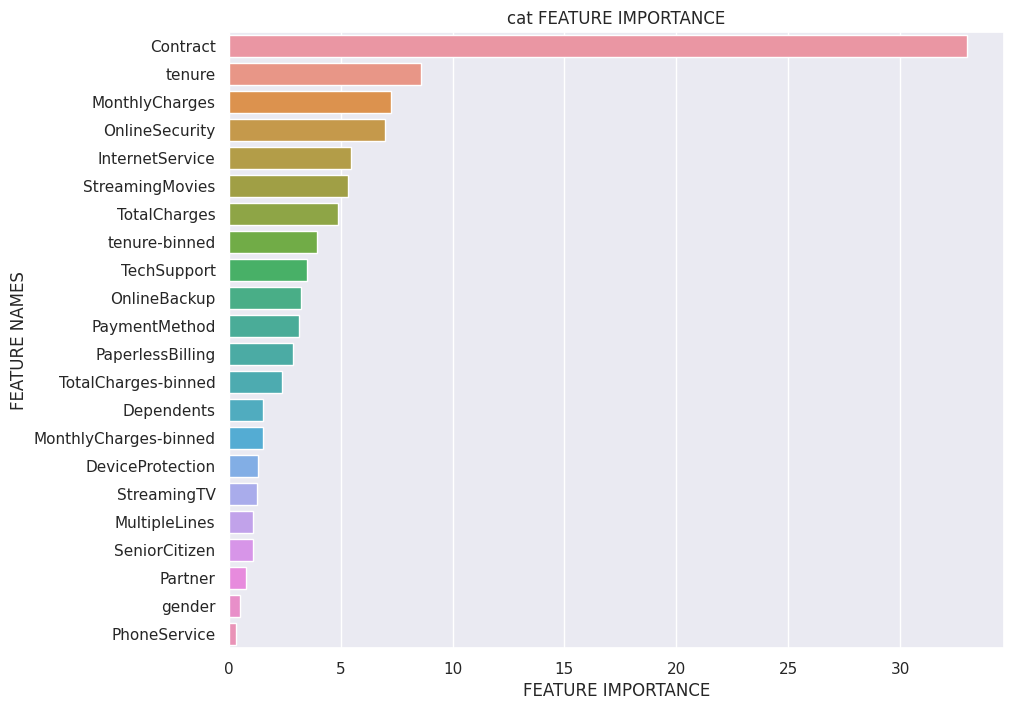

In [ ]:
%%time
# https://catboost.ai/en/docs/concepts/speed-up-training

fold_num = 10

cat_params  = {
    'eval_metric':"AUC",
    'loss_function': 'logloss',
    'objective': 'Logloss',
    'boosting_type': 'Plain',
    'bootstrap_type': 'Bayesian',
    'colsample_bylevel': 0.013457968759952536,
    'depth': 6,
    'iterations': 6888,
    'learning_rate': 0.05683590866750785,
    'random_strength': 18,
    'l2_leaf_reg': 50,
    'random_state': SEED,
    # 'task_type':"GPU",
    'devices' : '0',
    # 'cat_features':cat_cols
    }


cat = CatBoostClassifier(**cat_params)

train_model(cat, 'cat', X, y, X_test, fold_num)


In [ ]:
%%time
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=int(SEED), shuffle=True, stratify=y)

    # parameters
    params = {
        'iterations' : trial.suggest_int('iterations', 6000, 8000),
        'depth' : trial.suggest_int('depth', 3, 12),
        'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        "objective": trial.suggest_categorical("objective", ["Logloss"]),
        'colsample_bylevel': trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        'random_strength' :trial.suggest_int('random_strength', 0, 100),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        'random_state': trial.suggest_categorical('random_state',[SEED]),
    }

    model = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        l2_leaf_reg=50,
        **params
    )
    model.fit(X_train, y_train,
              verbose=False)
    val_preds = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, val_preds)

    return auc

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [ ]:
n_trials = int(200)

optuna.logging.set_verbosity(optuna_verbosity)

study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials, n_jobs = multiprocessing.cpu_count())

printmd('**BEST TRIAL**')
print("Best Score: ", study.best_value)
printmd('**CatBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

**BEST TRIAL**

Best Score:  0.8407734635356119


**CatBoost Tuned Hyperparameters**

{'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'colsample_bylevel': 0.019564034563552348,
 'depth': 5,
 'iterations': 7804,
 'learning_rate': 0.024515793232962078,
 'objective': 'Logloss',
 'random_state': 42,
 'random_strength': 93}


In [ ]:
# Save
pickle.dump(study.best_trial.params, open('CatBoost_Hyperparameter.pickle', 'wb'))
print("Best Score: ", study.best_value)

printmd('**CatBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

# history
display(optuna.visualization.plot_optimization_history(study))

# Importance
display(plot_param_importances(study))

Best Score:  0.8407734635356119


**CatBoost Tuned Hyperparameters**

{'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'colsample_bylevel': 0.019564034563552348,
 'depth': 5,
 'iterations': 7804,
 'learning_rate': 0.024515793232962078,
 'objective': 'Logloss',
 'random_state': 42,
 'random_strength': 93}


**xgb Init**

--------------------------------------------------
Fold 1
AUC Score :  0.8275201288244767
--------------------------------------------------
Fold 2
AUC Score :  0.8639613526570048
--------------------------------------------------
Fold 3
AUC Score :  0.831062801932367
--------------------------------------------------
Fold 4
AUC Score :  0.827415458937198
--------------------------------------------------
Fold 5
AUC Score :  0.842354829296761
--------------------------------------------------
Fold 6
AUC Score :  0.8568475829199493
--------------------------------------------------
Fold 7
AUC Score :  0.8605923548292966
--------------------------------------------------
Fold 8
AUC Score :  0.8602357098855495
--------------------------------------------------
Fold 9
AUC Score :  0.8545293907855915
--------------------------------------------------
Fold 10
AUC Score :  0.8658434221146085
--------------------------------------------------
Train : Base Model - xgb - AUC score : mean ---> 0.

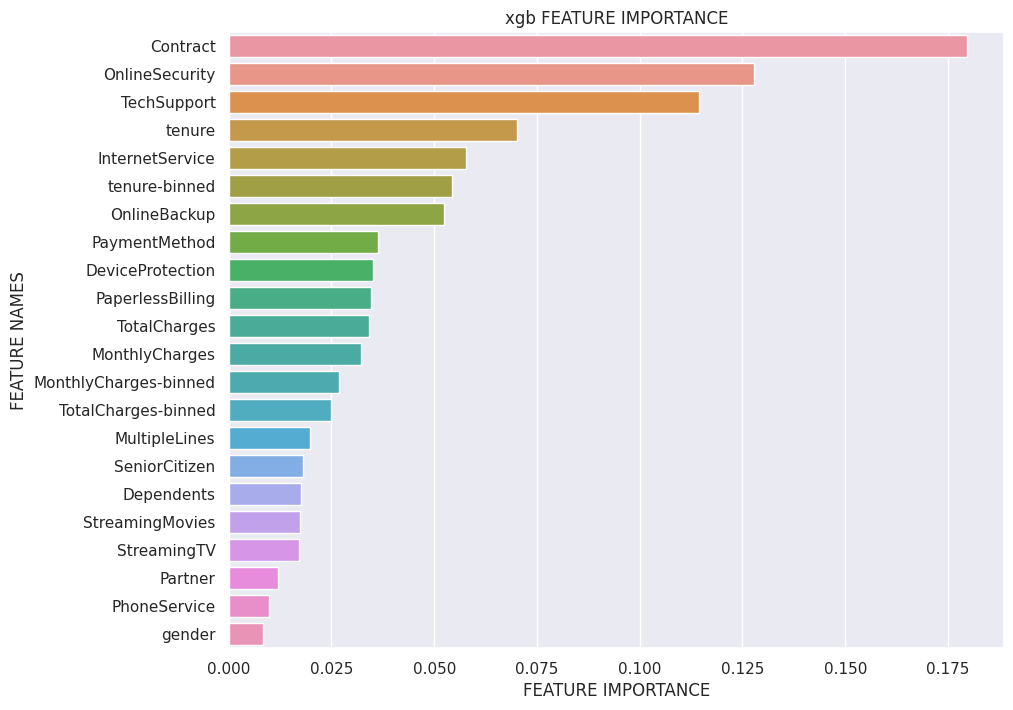

In [ ]:
%%time
fold_num = 10


xgb_params = {'colsample_bytree': 0.2645340949128848,
'gamma': 0,
'learning_rate': 0.001851851953410451,
'max_depth': 3,
'n_estimators': 6000,
'random_state': SEED,
'reg_lambda': 0.1,
'subsample': 0.6905005604726816,
'use_label_encoder': False }


xgb = XGBClassifier(**xgb_params)

train_model(xgb, 'xgb', X, y, X_test, fold_num)


# https://stackoverflow.com/questions/51022822/subsample-colsample-bytree-colsample-bylevel-in-xgbclassifier-python-3-x

In [ ]:
%%time
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=int(SEED), shuffle=True, stratify=y)

    params  = {
          'n_estimators': trial.suggest_categorical('n_estimators',[10000]),
          'learning_rate': trial.suggest_float('learning_rate',1e-3,5e-1,log=True),
          'max_depth': trial.suggest_int('max_depth',3,12),
          'colsample_bytree': trial.suggest_float('colsample_bytree',0.2,0.99,log=True),
          'subsample': trial.suggest_float('subsample',0.2,0.99,log=True),
          'eval_metric': trial.suggest_categorical('eval_metric',['auc']),
          'use_label_encoder':trial.suggest_categorical('use_label_encoder',[False]),
          'gamma': trial.suggest_categorical('gamma',[0, 0.25, 0.5, 1.0]),
          'reg_lambda': trial.suggest_categorical('reg_lambda',[0.1, 1.0, 5.0, 10.0, 50.0, 100.0]),
          'tree_method': trial.suggest_categorical('tree_method',['gpu_hist']),
          'gpu_id': trial.suggest_categorical('gpu_id',[0]),
          'predictor' : trial.suggest_categorical('predictor',['gpu_predictor']),
          'random_state': trial.suggest_categorical('random_state',[SEED])
         }

    # learning
    model = XGBClassifier(**params)
    model.fit(X_train, y_train,
              verbose=False) # 1000
    val_preds = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, val_preds) # AUROC requires probabilities of the predictions
    # print("AUC Score : ",auc) # check the auc score in each trial

    return auc

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


In [ ]:
%%time
n_trials = int(200)

optuna.logging.set_verbosity(optuna_verbosity)

study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials, n_jobs = multiprocessing.cpu_count())

printmd('**BEST TRIAL**')
print("Best Score: ", study.best_value)
printmd('**XGBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)


**BEST TRIAL**

Best Score:  0.8398150300963599


**XGBoost Tuned Hyperparameters**

{'colsample_bytree': 0.5745155836811463,
 'eval_metric': 'auc',
 'gamma': 0.25,
 'gpu_id': 0,
 'learning_rate': 0.0011616614732256178,
 'max_depth': 7,
 'n_estimators': 10000,
 'predictor': 'gpu_predictor',
 'random_state': 42,
 'reg_lambda': 50.0,
 'subsample': 0.21129237764943748,
 'tree_method': 'gpu_hist',
 'use_label_encoder': False}
CPU times: user 58min 31s, sys: 4min 44s, total: 1h 3min 16s
Wall time: 44min 30s


In [ ]:
# Save
pickle.dump(study.best_trial.params, open('XGB_Hyperparameter.pickle', 'wb'))
print("Best Score: ", study.best_value)

printmd('**XGBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)


# history
display(optuna.visualization.plot_optimization_history(study))

# Importance
display(plot_param_importances(study))

Best Score:  0.8398150300963599


**XGBoost Tuned Hyperparameters**

{'colsample_bytree': 0.5745155836811463,
 'eval_metric': 'auc',
 'gamma': 0.25,
 'gpu_id': 0,
 'learning_rate': 0.0011616614732256178,
 'max_depth': 7,
 'n_estimators': 10000,
 'predictor': 'gpu_predictor',
 'random_state': 42,
 'reg_lambda': 50.0,
 'subsample': 0.21129237764943748,
 'tree_method': 'gpu_hist',
 'use_label_encoder': False}


**lgbm Init**

--------------------------------------------------
Fold 1
AUC Score :  0.8259259259259258
--------------------------------------------------
Fold 2
AUC Score :  0.861940418679549
--------------------------------------------------
Fold 3
AUC Score :  0.8340016103059581
--------------------------------------------------
Fold 4
AUC Score :  0.8272785829307568
--------------------------------------------------
Fold 5
AUC Score :  0.8418603897156567
--------------------------------------------------
Fold 6
AUC Score :  0.8541160068735206
--------------------------------------------------
Fold 7
AUC Score :  0.8632752974743052
--------------------------------------------------
Fold 8
AUC Score :  0.8567746328178193
--------------------------------------------------
Fold 9
AUC Score :  0.8567178938494958
--------------------------------------------------
Fold 10
AUC Score :  0.8676594027441485
--------------------------------------------------
Train : Base Model - lgbm - AUC score : mean --->

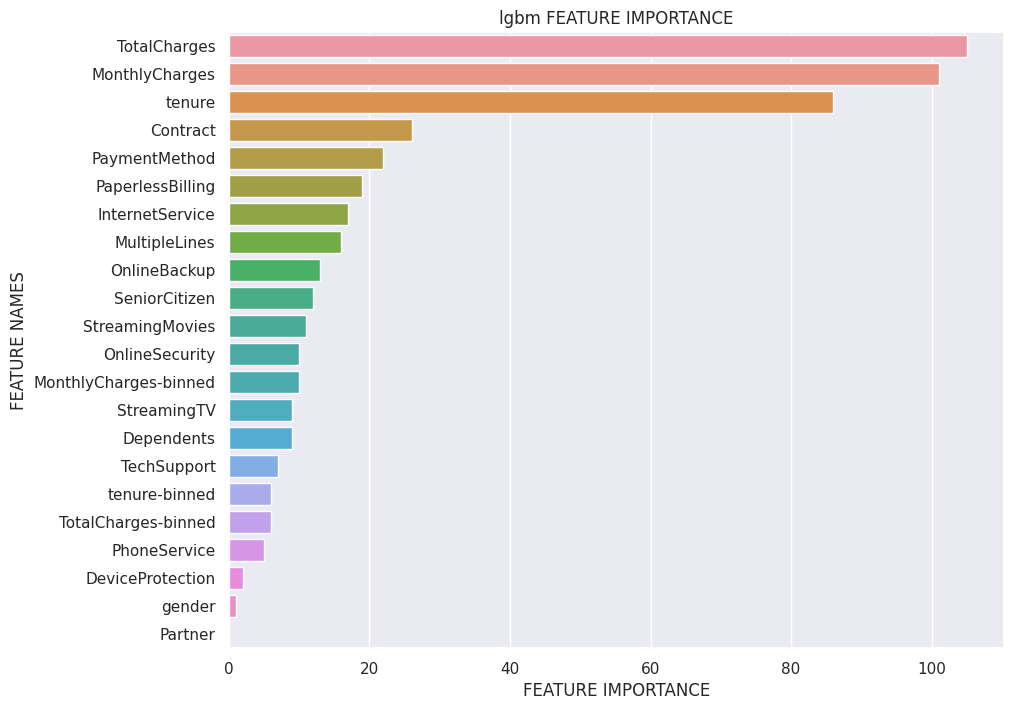

In [ ]:
%%time
#https://neptune.ai/blog/lightgbm-parameters-guide

fold_num = 10

lgbm_params = {'n_estimators': 12749,
               'learning_rate': 0.1985328656822506,
               'reg_alpha': 9.77289653841389,
               'reg_lambda': 4.979048257991328,
               'num_leaves': 921,
               'min_child_samples': 85,
               'max_depth': 56,
               'colsample_bytree': 0.43848926369957975,
               'cat_smooth': 92,
               'cat_l2': 17,
               'min_data_per_group': 59}


lgbm = LGBMClassifier(**lgbm_params)

train_model(lgbm, 'lgbm', X, y, X_test, fold_num)


In [ ]:
%%time
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=int(SEED), shuffle=True, stratify=y)

    params = {
        'objective': 'binary', # binary target
        'n_estimators': trial.suggest_int('n_estimators', 4000, 20000),
        'learning_rate' : trial.suggest_float('learning_rate',1e-3,5e-1,log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 1000), # num leaves = 2^max_depth
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200),
        'random_state': int(SEED),
        'device': 'cpu',
        'gpu_platform_id': 0,
        'gpu_device_id': 0,
    }

    # Learning
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train,
              verbose=False) # 1000
    val_pred = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, val_pred)

    return auc


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.06 µs


In [ ]:
%%time
n_trials = int(200)

# set logging level
optuna.logging.set_verbosity(optuna_verbosity)

study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials, n_jobs = multiprocessing.cpu_count())

printmd('**BEST TRIAL**')
print("Best Score: ", study.best_value)
printmd('**LGBM Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

**BEST TRIAL**

Best Score:  0.8402735797876463


**LGBM Tuned Hyperparameters**

{'cat_l2': 20,
 'cat_smooth': 25,
 'colsample_bytree': 0.2112995968222731,
 'learning_rate': 0.0014662920371153161,
 'max_depth': 31,
 'min_child_samples': 7,
 'min_data_per_group': 67,
 'n_estimators': 7403,
 'num_leaves': 61,
 'reg_alpha': 5.3399171897282995,
 'reg_lambda': 0.18650795349204968}
CPU times: user 30min 41s, sys: 6min 27s, total: 37min 8s
Wall time: 22min 17s


In [ ]:
def stacking_data_loader(model, model_name, train, y, test, fold):
    '''
    input train, test datasets and fold value!
    returns train, test datasets for stacking ensemble
    '''

    stk = StratifiedKFold(n_splits = fold, random_state = SEED, shuffle = True)

    # Declaration Pred Datasets
    train_fold_pred = np.zeros((train.shape[0], 1))
    test_pred = np.zeros((test.shape[0], fold))

    for counter, (train_index, valid_index) in enumerate(stk.split(train, y)):
        X_train, y_train = train.iloc[train_index], y[train_index]
        X_valid, y_valid = train.iloc[valid_index], y[valid_index]

        print('------------ Fold', counter+1, 'Start! ------------')
        if model_name == 'cat':
            model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
        elif model_name == 'xgb':
            model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose = False, early_stopping_rounds = 200)
        else:
            model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)

        print('------------ Fold', counter+1, 'Done! ------------')

        train_fold_pred[valid_index, :] = model.predict_proba(X_valid)[:, 1].reshape(-1, 1)
        test_pred[:, counter] = model.predict_proba(test)[:, 1]
        del X_train, y_train, X_valid, y_valid
        gc.collect()

    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)

    del test_pred
    gc.collect()

    print('Done!')

    return train_fold_pred, test_pred_mean

In [ ]:
%%time
lgbm_params = {'n_estimators': 12749,
               'learning_rate': 0.1985328656822506,
               'reg_alpha': 9.77289653841389,
               'reg_lambda': 4.979048257991328,
               'num_leaves': 921,
               'min_child_samples': 85,
               'max_depth': 56,
               'colsample_bytree': 0.43848926369957975,
               'cat_smooth': 92,
               'cat_l2': 17,
               'min_data_per_group': 59}


lgbm = LGBMClassifier(**lgbm_params)


xgb_params = {'colsample_bytree': 0.2645340949128848,
              'eval_metric': 'auc',
              'gamma': 0,
              'learning_rate': 0.001851851953410451,
              'max_depth': 3,
              'n_estimators': 6000,
              'random_state': SEED,
              'reg_lambda': 0.1,
              'subsample': 0.6905005604726816,
              'use_label_encoder': False }

xgb = XGBClassifier(**xgb_params)


cat_params  = {'eval_metric':"AUC",
              #  'task_type':"GPU",
              'loss_function': 'logloss',
              'boosting_type': 'Plain',
              'bootstrap_type': 'Bayesian', # 0.846998114133664
              'colsample_bylevel': 0.013457968759952536,
              'depth': 6,
              'iterations': 6888,
              'learning_rate': 0.05683590866750785,
              'objective': 'Logloss',
              'random_strength': 18,
              'l2_leaf_reg': 50,
              'random_state': SEED,
              }


cat = CatBoostClassifier(**cat_params)

fold_num = 5

cat_train, cat_test = stacking_data_loader(cat, 'cat', X, y, X_test, fold_num)
del cat
gc.collect()

lgbm_train, lgbm_test = stacking_data_loader(lgbm, 'lgbm', X, y, X_test, fold_num)
del lgbm
gc.collect()

xgb_train, xgb_test = stacking_data_loader(xgb, 'xgb', X, y, X_test, fold_num)
del xgb
gc.collect()


------------ Fold 1 Start! ------------
------------ Fold 1 Done! ------------
------------ Fold 2 Start! ------------
------------ Fold 2 Done! ------------
------------ Fold 3 Start! ------------
------------ Fold 3 Done! ------------
------------ Fold 4 Start! ------------
------------ Fold 4 Done! ------------
------------ Fold 5 Start! ------------
------------ Fold 5 Done! ------------
Done!
------------ Fold 1 Start! ------------
------------ Fold 1 Done! ------------
------------ Fold 2 Start! ------------
------------ Fold 2 Done! ------------
------------ Fold 3 Start! ------------
------------ Fold 3 Done! ------------
------------ Fold 4 Start! ------------
------------ Fold 4 Done! ------------
------------ Fold 5 Start! ------------
------------ Fold 5 Done! ------------
Done!
------------ Fold 1 Start! ------------
------------ Fold 1 Done! ------------
------------ Fold 2 Start! ------------
------------ Fold 2 Done! ------------
------------ Fold 3 Start! ------------


0

In [ ]:
stack_X_train = np.concatenate((cat_train, lgbm_train, xgb_train), axis = 1)
stack_X_test = np.concatenate((cat_test, lgbm_test, xgb_test), axis = 1)

del cat_train, lgbm_train, xgb_train, cat_test, lgbm_test, xgb_test
gc.collect()

stack_X_train.shape, stack_X_test.shape

((5634, 3), (1409, 3))

Fold 1 AUC : 0.8654936745673986
Fold 2 AUC : 0.8596448709870259
Fold 3 AUC : 0.851283666973648
Fold 4 AUC : 0.8434152488972904
Fold 5 AUC : 0.8247240903778414
AUC score : mean ---> 0.848912310360641, std ---> 0.014219989447326456


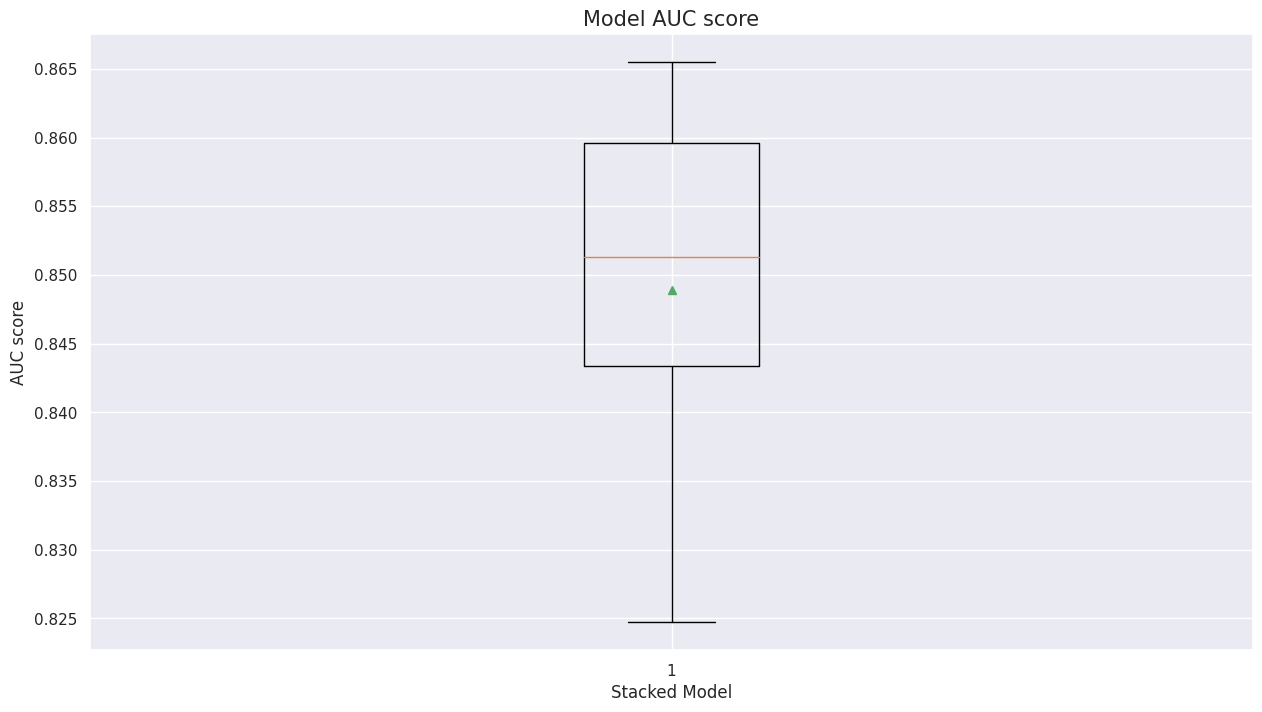

In [ ]:
# meta model : LogisticRegression
fold = 5
stk = StratifiedKFold(n_splits = fold, random_state = None, shuffle = False)
test_pred_log_reg = np.zeros((stack_X_test.shape[0], fold))
auc_scores = []

for counter, (train_index, valid_index)in enumerate(stk.split(stack_X_train, y)):
    X_train, y_train = stack_X_train[train_index], y[train_index]
    X_valid, y_valid = stack_X_train[valid_index], y[valid_index]

    lr = LogisticRegression(n_jobs = -1, random_state = SEED, C = 0.05, max_iter = 3000)
    lr.fit(X_train, y_train)

    valid_pred_log_reg = lr.predict_proba(X_valid)[:, 1]
    test_pred_log_reg[:, counter] = lr.predict_proba(stack_X_test)[:, 1]

    auc = roc_auc_score(y_valid, valid_pred_log_reg)
    auc_scores.append(auc)

    print('Fold', counter+1 , 'AUC :', auc)
    fold += 1

test_pred_log_reg_mean = np.mean(test_pred_log_reg, axis = 1).reshape(-1, 1)

print(f'AUC score : mean ---> {np.mean(auc_scores)}, std ---> {np.std(auc_scores)}')

plt.boxplot(auc_scores, showmeans=True)
plt.title("Model AUC score",  fontsize= 15)
plt.xlabel("Stacked Model", fontsize=12)
plt.ylabel("AUC score",  fontsize=12)


plt.show()

In [ ]:
roc_auc_score_log_reg = roc_auc_score(y_test, test_pred_log_reg_mean)

printmd(f"AUC on the test dataset : **{roc_auc_score_log_reg}**")

AUC on the test dataset : **0.84854943294841**

In [ ]:
import numpy as np

# Assuming you have a 2D numpy array of predictions called 'predictions'
threshold = 0.5

binary_predictions = []

for row in test_pred_log_reg_mean:
    binary_row = []
    for prediction in row:
        binary_value = 1 if prediction >= threshold else 0
        binary_row.append(binary_value)
    binary_predictions.append(binary_row)

In [ ]:
binary_predictions_mean = np.mean(binary_predictions, axis = 1).reshape(-1, 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, binary_predictions)
print(accuracy)

0.8048261178140526


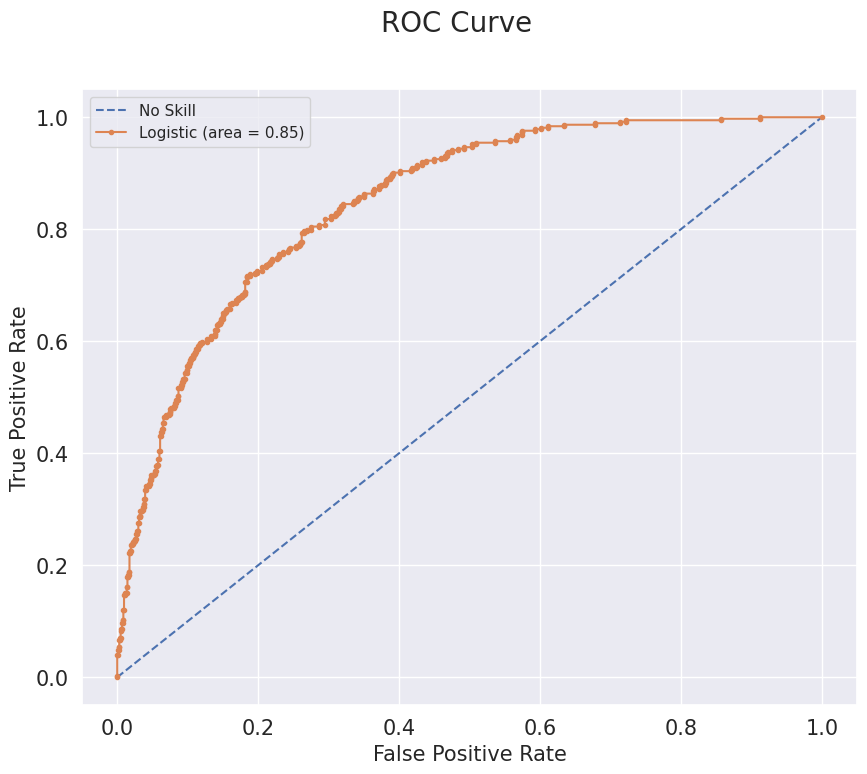

In [ ]:
plt.figure(figsize=(10,8))


plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')


fpr, tpr, _ = roc_curve(y_test, test_pred_log_reg_mean)

font_size = 15
plt.plot(fpr, tpr, marker='.', label=f'Logistic (area = {roc_auc_score_log_reg:0.2f})')


plt.xlabel('False Positive Rate', fontsize=font_size)
plt.ylabel('True Positive Rate', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.suptitle('ROC Curve', fontsize=20)

plt.legend()

plt.show()


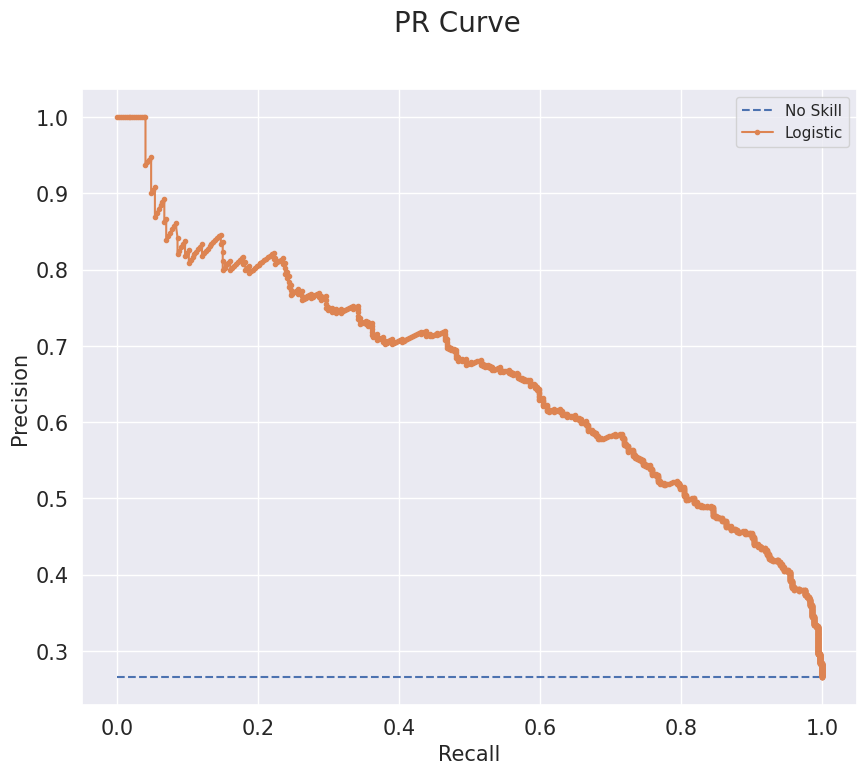

In [ ]:
plt.figure(figsize=(10,8))


no_skill = len(y[y==1]) / len(y)


plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')


precision, recall, _ = precision_recall_curve(y_test, test_pred_log_reg_mean)

font_size = 15
plt.plot(recall, precision, marker='.', label='Logistic')


plt.suptitle('PR Curve', fontsize=20)


plt.xlabel('Recall', fontsize=font_size)
plt.ylabel('Precision', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.legend()

plt.show()


**Model Evaluation :**

>logreg, cross-validation score - mean  : 0.805 std: (0.019)
>knn, cross-validation score - mean  : 0.762 std: (0.015)
>rforest, cross-validation score - mean  : 0.792 std: (0.019)
>etree, cross-validation score - mean  : 0.781 std: (0.016)
>svm, cross-validation score - mean  : 0.797 std: (0.018)
>catboost, cross-validation score - mean  : 0.809 std: (0.019)
>XGBoost, cross-validation score - mean  : 0.807 std: (0.020)
>LGBClassifier, cross-validation score - mean  : 0.804 std: (0.021)
>stacking, cross-validation score - mean  : 0.806 std: (0.019)


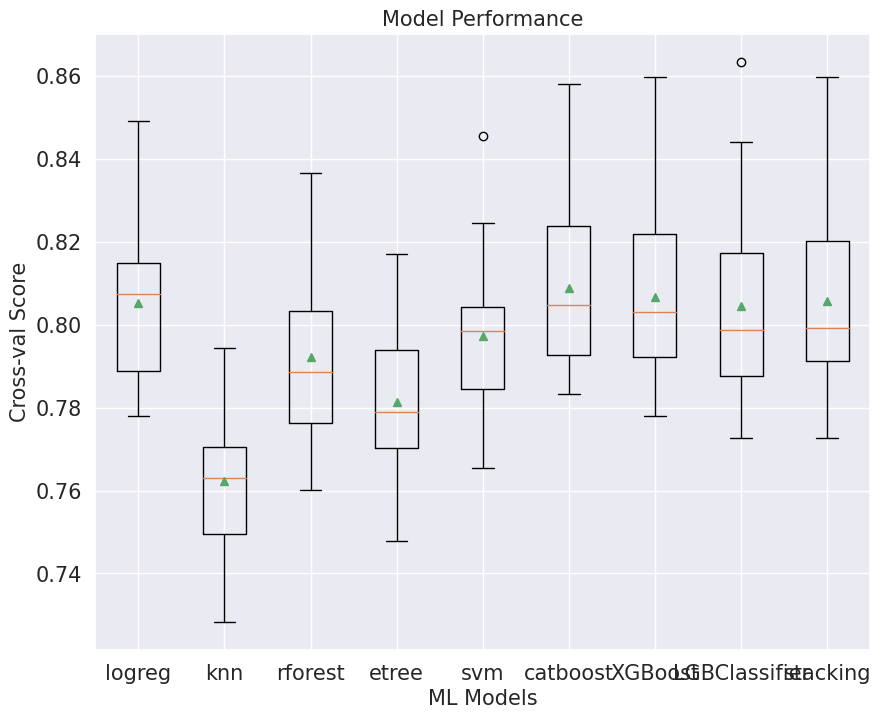

In [ ]:
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('logreg', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('rforest', RandomForestClassifier()))
  level0.append(('etree', ExtraTreesClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('catboost', CatBoostClassifier(**cat_params)))
  level0.append(('XGBoost', XGBClassifier(**xgb_params)))
  level0.append(('LGBClassifier', LGBMClassifier(**lgbm_params)))

  # define meta learner model
  level1 = LogisticRegression()

  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

# get a list of models to evaluate
def get_models():
  models = dict()
  models['logreg'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['rforest'] = RandomForestClassifier()
  models['etree'] = ExtraTreesClassifier()
  models['svm'] = SVC()
  models['catboost']= CatBoostClassifier(**cat_params)
  models['XGBoost']= XGBClassifier(**xgb_params)
  models['LGBClassifier']= LGBMClassifier(**lgbm_params)
  models['stacking'] = get_stacking()
  return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

printmd("**Model Evaluation :**")

for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s, cross-validation score - mean  : %.3f std: (%.3f)' % (name, np.mean(scores), np.std(scores)))

printmd("")

# plot model performance for comparison
font_size = 15
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)

plt.title("Model Performance",  fontsize=font_size)
plt.xlabel("ML Models", fontsize=font_size)
plt.ylabel("Cross-val Score",  fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.show()